
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [ ]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784',as_frame=False, return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

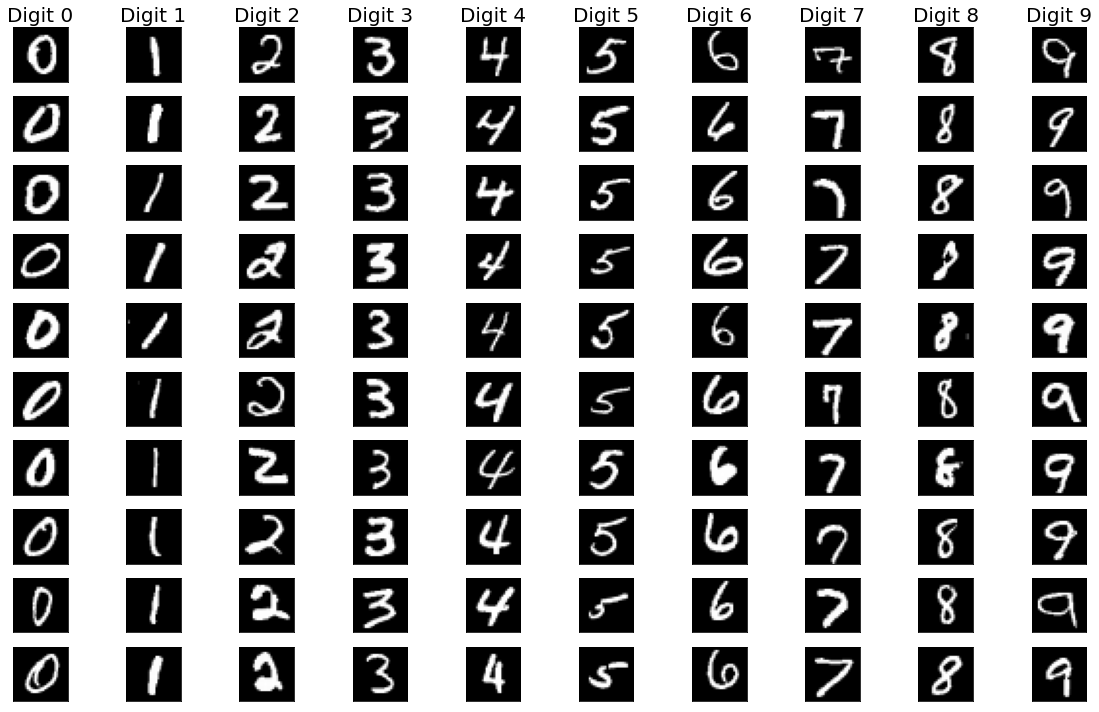

In [ ]:
def Q1(num_examples=10):
  plt.rc('image', cmap='gray')
  # create subplot
  fig, axes = plt.subplots(nrows=num_examples, ncols=10, figsize=(16, num_examples))

  # iterate over each digit
  for digit in range(10):
    # set column title
    axes[0][digit].set_title(f"Digit {digit}", fontsize=20)
    # find indices of images with correct digit label
    digit_index = np.where(train_labels == str(digit))

    # plot images in a column
    for example in range(num_examples):
      # get correct axis
      axis = axes[example][digit]
      # pull example from training data, reshape image, assign to axis
      axis.imshow(np.reshape(train_data[digit_index[0][example]], (28,28)))
  
  # remove residual plot ticks and show
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.tight_layout()
  plt.show()
  

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [ ]:
def Q2(k_values):

  # produce a model for each k
  for k in k_values:
    # create model
    clf = KNeighborsClassifier(n_neighbors=k)
    # fit model to mini train data 
    clf.fit(mini_train_data, mini_train_labels)
    # model accuracy on validation data
    print(f"Model Accuracy for k={k}: {clf.score(dev_data, dev_labels)}")

    # print precision, recall, and F1 for K=1
    if k == 1:
      y_pred = clf.predict(dev_data)
      print(classification_report(dev_labels, y_pred))

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

Model Accuracy for k=1: 0.884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Model Accuracy for k=3: 0.876
Model Accuracy for k=5: 0.882
Model Accuracy for k=7: 0.877
Model Accuracy for k=9: 0.875


Answer to part 4: 

For the 1-Nearest Neighbor model, it was the most difficult for it to classify digit 8. The reason that I believe this is because this label has the lowest F1 score.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

train_size=100
Time to train: 0.001394510269165039 seconds
Time to evaluate accuracy: 0.058589935302734375 seconds


train_size=200
Time to train: 0.0009915828704833984 seconds
Time to evaluate accuracy: 0.0630335807800293 seconds


train_size=400
Time to train: 0.0023391246795654297 seconds
Time to evaluate accuracy: 0.08248710632324219 seconds


train_size=800
Time to train: 0.0027272701263427734 seconds
Time to evaluate accuracy: 0.10596847534179688 seconds


train_size=1600
Time to train: 0.004109621047973633 seconds
Time to evaluate accuracy: 0.1704573631286621 seconds


train_size=3200
Time to train: 0.007871866226196289 seconds
Time to evaluate accuracy: 0.2540287971496582 seconds


train_size=6400
Time to train: 0.015943288803100586 seconds
Time to evaluate accuracy: 0.48589277267456055 seconds


train_size=12800
Time to train: 0.021599769592285156 seconds
Time to evaluate accuracy: 0.8264164924621582 seconds


train_size=25600
Time to train: 0.04254579544067383 seconds
Time to

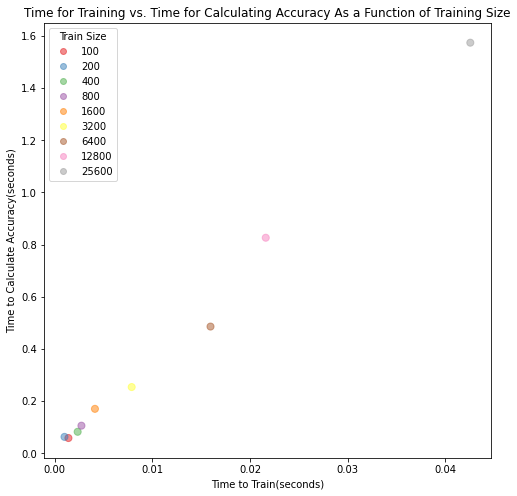

In [ ]:
def Q3(train_sizes, accuracies, train_times, eval_times):

  # create knn model for each train size
  for train_size in train_sizes:
    # create knn classifier
    clf = KNeighborsClassifier(n_neighbors=1)

    print(f"train_size={train_size}")

    # fit training data and measure time
    fit_time_start = time.time()
    clf.fit(train_data[:train_size], train_labels[:train_size])
    fit_time_end = time.time()
    diff = fit_time_end - fit_time_start
    print(f"Time to train: {diff} seconds")
    train_times.append(diff)

    # measure accuracy and measure time
    accuracy_time_start = time.time()
    accuracy = clf.score(dev_data, dev_labels)
    accuracy_time_end = time.time()
    accuracies.append(accuracy)
    diff = accuracy_time_end - accuracy_time_start
    print(f"Time to evaluate accuracy: {diff} seconds")
    eval_times.append(diff)

    # empty line
    print("\n")
  
  fig = plt.figure(figsize=(8, 8))
  scatter = plt.scatter(train_times, eval_times, c=np.log(train_sizes),s=50, alpha=0.5, cmap='Set1')
  plt.title("Time for Training vs. Time for Calculating Accuracy As a Function of Training Size")
  plt.xlabel("Time to Train(seconds)")
  plt.ylabel("Time to Calculate Accuracy(seconds)")
  plt.legend(handles=scatter.legend_elements()[0], labels=train_sizes, title="Train Size")
  plt.show()

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

Answer to Part 4:

What I see is that as we increase the size of training set, the time to fit increases marginally. On the other hand, the time to evaluate the accuracy of the model increases substantially. This is inline with what is expected. This is because when we fit the model, the training set is simply saved to memory, so we do not expect a large increase of time to fit the model with an increase in training set size. When we measure the accuracy though, we must calculate the distance to each training sample. So with an increase in training set size, we can expect there to be a large increase in time to calculate the accuracy of our model.

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

R^2 Value of Linear Regression Model: 0.4177006634161019
Predicted accuracy for training_size=60000: 1.2361731707874237
Predicted accuracy for training_size=120000: 1.637428053637104
Predicted accuracy for training_size=1000000: 7.522499668765751


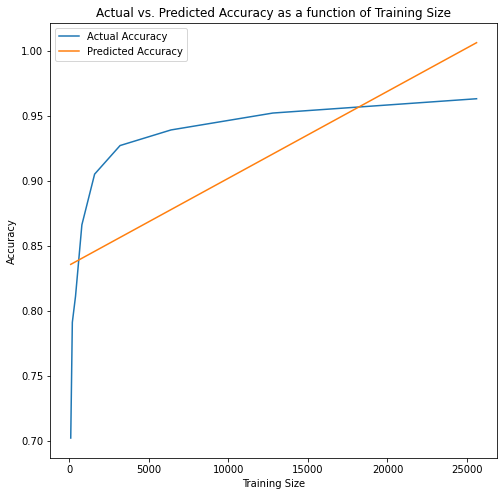




R^2 Value of Linear Regression Model with Transform: 0.6163460585597078
Predicted accuracy for training_size=60000: 0.9980193815810603
Predicted accuracy for training_size=120000: 0.9999780820305084
Predicted accuracy for training_size=1000000: 1.0


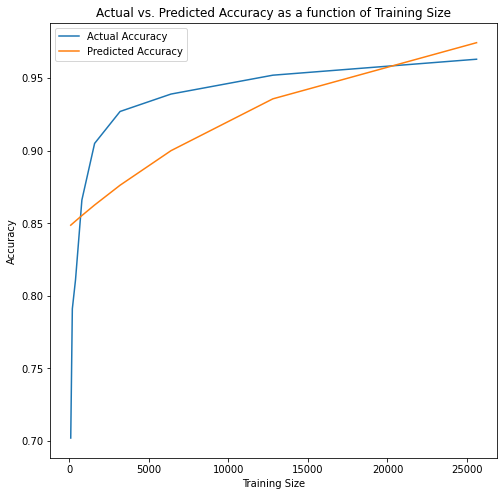

In [ ]:
# function to perform logistic function on an array of elements
def logit(arr):
  output = list()

  for value in arr:
      output.append(math.log((value / (1 - value))))

  return output

# function to perform logit function on an array of elements
def expit(arr):
  output = list()

  for value in arr:
      output.append(math.exp(value) / (1 + math.exp(value)))

  return output

def Q4():
  # values we want to predict
  x = [60000, 120000, 1000000]

  # create regression model (accuracy ~ train size)
  reg = LinearRegression().fit(np.array(train_sizes).reshape(-1, 1), np.array(accuracies).reshape(-1, 1))
  print(f"R^2 Value of Linear Regression Model: {reg.score(np.array(train_sizes).reshape(-1, 1), np.array(accuracies).reshape(-1, 1))}")
  
  # get predictions for input
  y_hat = reg.predict(np.array(x).reshape(-1, 1))
  for input, output in zip(x, y_hat):
    print(f"Predicted accuracy for training_size={input}: {output[0]}")

  # get predictions to compare to actual accuracies 
  y_hat = reg.predict(np.array(train_sizes).reshape(-1, 1))
  # plot actual vs predicted accuracies
  fig = plt.figure(figsize=(8, 8))
  plt.plot(train_sizes, accuracies,  label="Actual Accuracy")
  plt.plot(train_sizes, y_hat, label="Predicted Accuracy")
  plt.xlabel("Training Size")
  plt.ylabel("Accuracy")
  plt.title("Actual vs. Predicted Accuracy as a function of Training Size")
  plt.legend()
  plt.show()

  print("\n\n")

  # apply logistic transform to accuracy 
  y_transformed = logit(accuracies)
  # create regression model (logistic(accuracy) ~ train size)
  reg_transformed = LinearRegression().fit(np.array(train_sizes).reshape(-1, 1), np.array(y_transformed).reshape(-1, 1))
  print(f"R^2 Value of Linear Regression Model with Transform: {reg_transformed.score(np.array(train_sizes).reshape(-1, 1), np.array(y_transformed).reshape(-1, 1))}")

  # get predictions for input
  y_hat = expit(reg_transformed.predict(np.array(x).reshape(-1, 1)))
  for input, output in zip(x, y_hat):
    print(f"Predicted accuracy for training_size={input}: {output}")

  # get predictions to compare to actual accuracies 
  y_hat = expit(reg_transformed.predict(np.array(train_sizes).reshape(-1, 1)))
  # plot actual vs predicted accuracies
  fig = plt.figure(figsize=(8, 8))
  plt.plot(train_sizes, accuracies,  label="Actual Accuracy")
  plt.plot(train_sizes, y_hat, label="Predicted Accuracy")
  plt.xlabel("Training Size")
  plt.ylabel("Accuracy")
  plt.title("Actual vs. Predicted Accuracy as a function of Training Size")
  plt.legend()
  plt.show()


  



Q4()

Answer to part 5:  
One thing that I notice about our model is that is is not able to pick up the exponential curve compared to our real data. Since we are using a linear model, we are making the assumption that our data is linearly related which is not true as seen in our line graph. Thus our model fit is poor. Another issue is that as we increase our training size, our model will start to predict accuracies above 1. Is is not possible to get an accuracy above 1, so this is another issue with our model. 

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

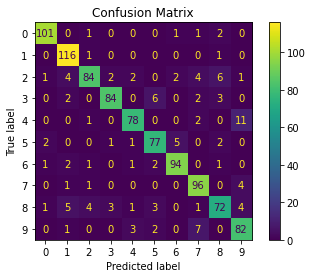

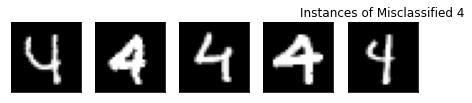

In [ ]:
def Q5():
  # number of misclassified examples to show
  NUM_EXAMPLES = 5

  # create knn model
  clf = KNeighborsClassifier(n_neighbors=1)
  # fit model to train data
  clf.fit(mini_train_data, mini_train_labels)
  # get predictions for dev data
  y_hat = clf.predict(dev_data)

  # display confusion matrix 
  disp = ConfusionMatrixDisplay(confusion_matrix(dev_labels, y_hat))
  disp.plot()
  plt.title("Confusion Matrix")
  plt.show()

  # empty space
  print("\n\n")

  # find instances where knn misclassified 4 as 9
  misclassified = np.where(dev_labels != y_hat)[0]
  label_4 = np.where(dev_labels == '4')[0]
  label_9 = np.where(y_hat == '9')[0]
  idxs = np.intersect1d(misclassified, label_4)
  idxs = np.intersect1d(idxs, label_9)

  # create subplot
  plt.rc('image', cmap='gray')
  fig, axes = plt.subplots(ncols=NUM_EXAMPLES)

  # show examples
  for i in range(NUM_EXAMPLES):
     # get correct axis
      axis = axes[i]
      # pull example from training data, reshape image, assign to axis
      axis.imshow(np.reshape(dev_data[idxs[i]], (28,28)))

  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.tight_layout()
  plt.title("Instances of Misclassified 4")
  plt.show()

Q5()


Answer to part 3: 

We can see that based on our confusion matrix, our model often mistakes the digit 4 for the label 9.